In [1]:
%pylab inline
from nsaba import Nsaba
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
ns_path = "/Users/Torben/Documents/ABI analysis/current_data_new/"
#ns_path = '/Users/SP/Documents/'
aba_path = '/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/'
#aba_path = '/Users/SP/Documents/'
Nsaba.aba_load(aba_path)
Nsaba.ns_load(ns_path)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.
database.txt loaded.
features.txt loaded.


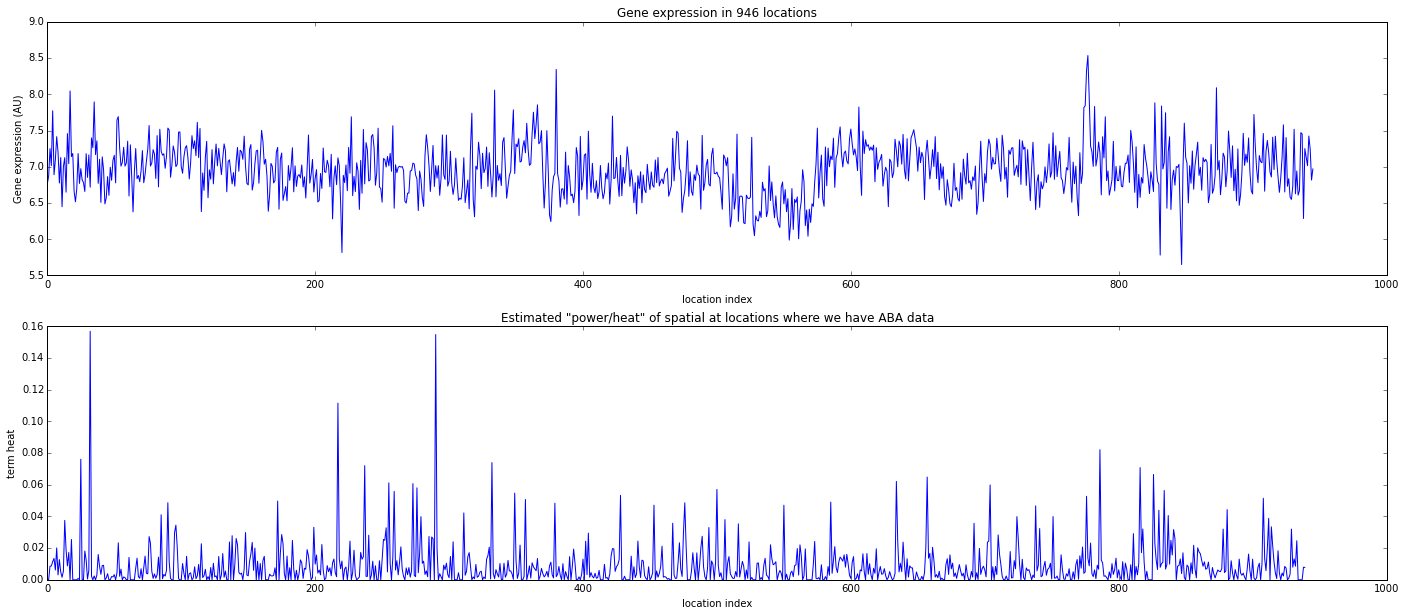

In [5]:
#gathering data for one gene and one term
term = 'spatial'
gene_entrez = 1815 

A = Nsaba()
A.get_aba_ge([gene_entrez])
A.get_ns_act(term, thresh=-1, method='knn')

fig = plt.figure(figsize=(24,10))
ax1 = fig.add_subplot(2, 1, 1);
ax1.plot(A.ge[gene_entrez])
title('Gene expression in 946 locations')
xlabel('location index')
ylabel('Gene expression (AU)')

ax2 = fig.add_subplot(2, 1, 2);
ax2.plot(A.term[term]['ns_act_vector'])
title('Estimated "power/heat" of ' + term +' at locations where we have ABA data')
xlabel('location index')
ylabel('term heat')

Correlation between spatial and gene number 1815
[[ 1.          0.03287039]
 [ 0.03287039  1.        ]]
Linear regression between spatial and gene number 1815 Slope =0.00547391368105 y intercept = 0.245582827817


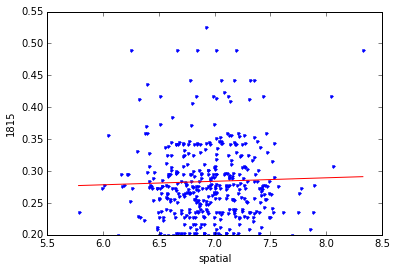

In [4]:
term = 'alzheimer'
gene_entrez = 100

ge_ns_mat = A.make_ge_ns_mat(term, gene_entrez);

correlation = np.corrcoef(ge_ns_mat[:,0],ge_ns_mat[:,1])

X = np.vstack([ge_ns_mat[:,0], np.ones(len(ge_ns_mat[:,0]))]).T
m, c = np.linalg.lstsq(X, ge_ns_mat[:,1])[0]


print 'Correlation between ' + term + ' and gene number ' + str(gene_entrez)
print correlation
print 'Linear regression between ' + term + ' and gene number ' + str(gene_entrez) +' Slope =' + str(m) + ' y intercept = '+ str(c)

plt.plot(ge_ns_mat[:,0],ge_ns_mat[:,1],'.')
plt.plot([min(ge_ns_mat[:,0]), max(ge_ns_mat[:,0])],[m*min(ge_ns_mat[:,0])+c,m*max(ge_ns_mat[:,0])+c],'r')
xlabel(term)
ylabel(str(gene_entrez))

In [ ]:
'''
coming soon:
- multiple linear regression
- input custom coordinates for analysis
'''

